## Advanced Lane Finding

### The Project
---

The goals / steps of this project are the following:


* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

#### Camera calibration
---
Use the chessboard to calibrate camera

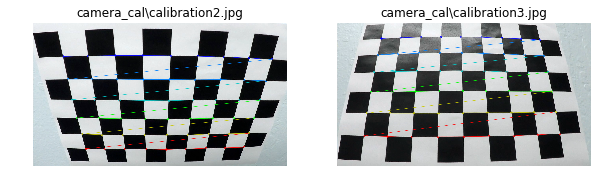

(array([[1.15777818e+03, 0.00000000e+00, 6.67113857e+02],
        [0.00000000e+00, 1.15282217e+03, 3.86124583e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-0.24688507, -0.02373156, -0.00109831,  0.00035107, -0.00259866]]))

In [22]:
import numpy as np
import glob
import util_cal
import util_pipe 
import util_lane
%matplotlib inline

util_cal.calibrate_camera('camera_cal/calibration*.jpg', 'calibration_pickle.p', plot=True)

     

Save the calibration parameters to pickle file

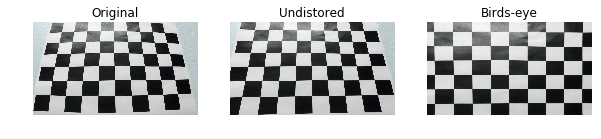

In [23]:
import cv2
mtx, dist = util_cal.get_undistorted_params('calibration_pickle.p')
img = cv2.imread('camera_cal/calibration3.jpg')

src, dst = util_cal.roi_from_corners(img, nx=9, ny=6)
util_cal.plt_birds_view(img, mtx, dist, src, dst)


cv2 processing utilities

#### distortion correction
===


In [24]:
def convert4to3(fnames):
    for name in fnames:
        image = cv2.imread(name)
        img_size = np.shape(image)
        print(name, ' - ', img_size)
        if img_size[2] == 4:
            print('4 channels - ', name)
            new = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
            new_size = np.shape(new)
            cv2.imwrite(name, new)
            print('channels = ', new_size[2])
            plt.inshow(new)
            plt.show()
        
#fnames = glob.glob('./test_images/*.jpg')
#convert4to3(fnames)

./test_images\straight_lines1.jpg


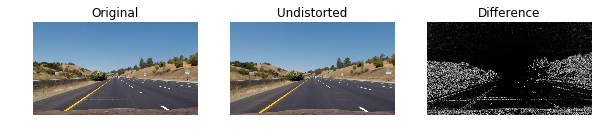

./test_images\straight_lines2.jpg


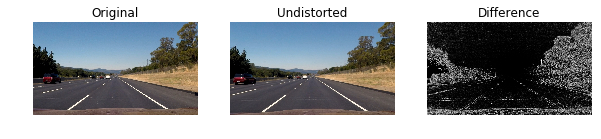

./test_images\test1.jpg


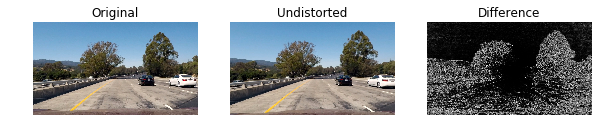

./test_images\test2.jpg


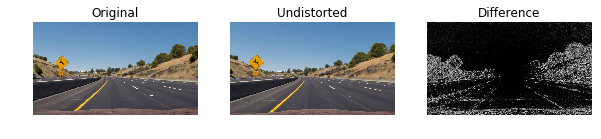

./test_images\test4.jpg


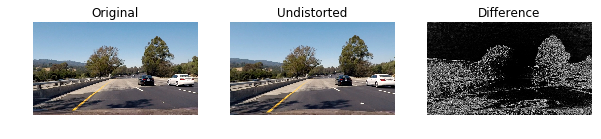

./test_images\test5.jpg


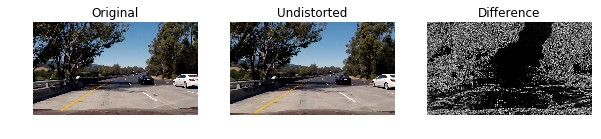

./test_images\test6.jpg


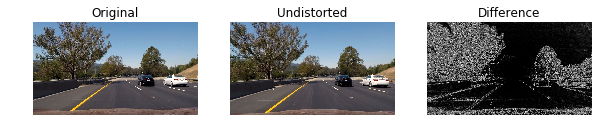

In [5]:
fnames=glob()
#undist = util_cal.get_undistorted_images_from_path('./test_images/*.jpg', mtx, dist, plot=True)


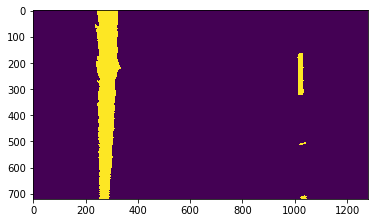

In [6]:
import matplotlib.pyplot as plt
image_ud = undist[0]
img_size = np.shape(image_ud)
src, dst = util_cal.get_transform_points(img_size)
warped, M, Minv = util_cal.warp_image(image_ud,src,dst, (img_size[1],img_size[0]))
binary = util_pipe.pipeline_YW(warped)
plt.imshow(binary)
plt.show()

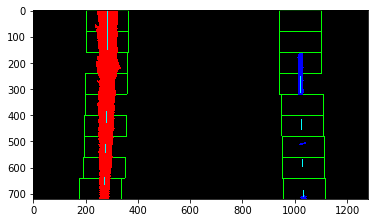

In [7]:
left_fit, right_fit, left_curverad, right_curverad, out_img = util_lane.slide_window_fit(binary)
plt.imshow(out_img)

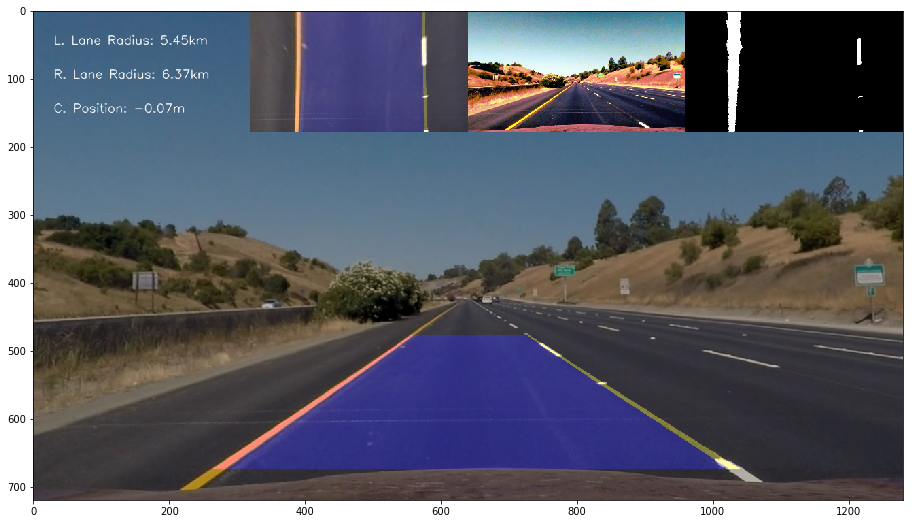

In [8]:
result1 = util_lane.mapping_fit_lane(warped, binary, image_ud, left_fit, right_fit, left_curverad, right_curverad, Minv)
fig = plt.figure(figsize=(16, 9))
plt.imshow(result1)

['straight_lines1.jpg', 'straight_lines2.jpg', 'test1.jpg', 'test2.jpg', 'test4.jpg', 'test5.jpg', 'test6.jpg']


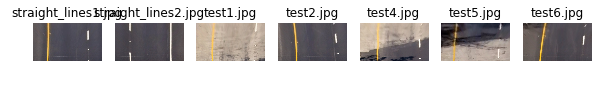

In [32]:
import os
imgs = undist
fnames = glob.glob('./test_images/*.jpg')
snames=[]
for fname in fnames:
    head,tail = os.path.split(fname)
    snames.append(tail)
print(snames)
tops=[]
for idx, img in enumerate(imgs):
    img_size = np.shape(img)
    src, dst = util_cal.get_transform_points(img_size)
    warped, M_warp, Minv_warp = util_cal.warp_image(img,src,dst,(img_size[1],img_size[0]))
    tops.append(warped)
   
util_cal.plt_n(tops, snames) #views(img, warped, src, dst)

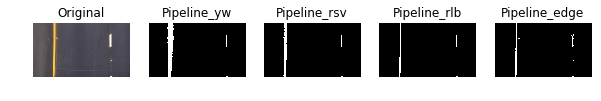

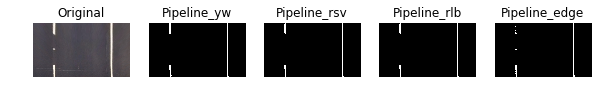

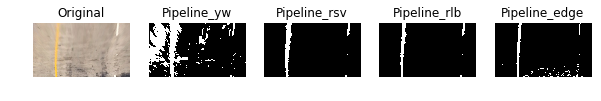

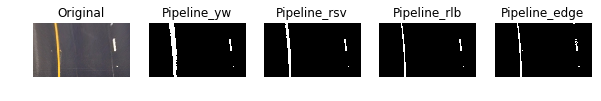

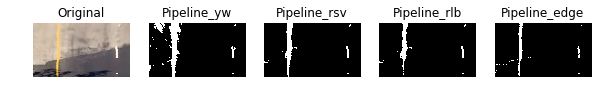

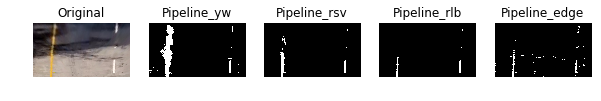

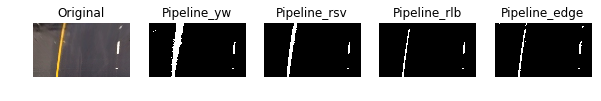

In [21]:
topws = []
for top in tops:
    pipe_yw = util_pipe.pipeline_YW(top)
    pipe_rsv  = util_pipe.pipeline_rsv(top,r_thresh=(220,255),s_thresh=(100,255),v_thresh=(100,255))
    pipe_rlb  = util_pipe.pipeline_rlb(top,r_thresh=(220,255),l_thresh=(215,255),b_thresh=(145,255))
    pipe_edge = util_pipe.pipeline_edge(top)
    # topws.append(pipe_rlb)
    topws.append(pipe_edge) # line) #rsv) #edge)
    
    #util_cal.plt_n([top,pipe_yw,top_rsv], ['Original','Pipeline'])
    util_cal.plt_n([top,pipe_yw,pipe_rsv,pipe_rlb,pipe_edge], ['Original','Pipeline_yw','Pipeline_rsv','Pipeline_rlb','Pipeline_edge'])